In [1]:
# Step 1: Install Required Libraries (Run only if not installed)
!pip install numpy pandas scikit-learn matplotlib seaborn

In [2]:
# Step 2: Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [3]:
# Import ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# Step 3: Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

In [6]:
# Step 4: Split Dataset into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [7]:
# Step 5: Standardize Features (Only for distance-based models like SVM & KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Step 6: Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),  # Enable probability for ROC Curve
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}


🔹 Training Logistic Regression...
✅ Accuracy: 0.9333
📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


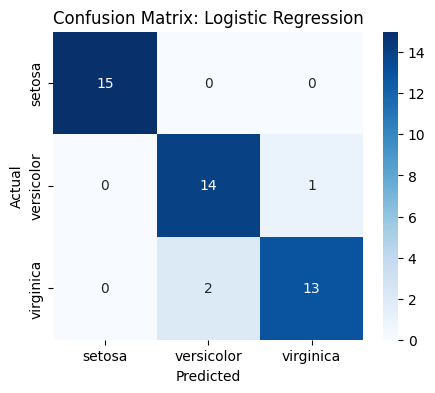


🔹 Training Decision Tree...
✅ Accuracy: 0.9333
📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



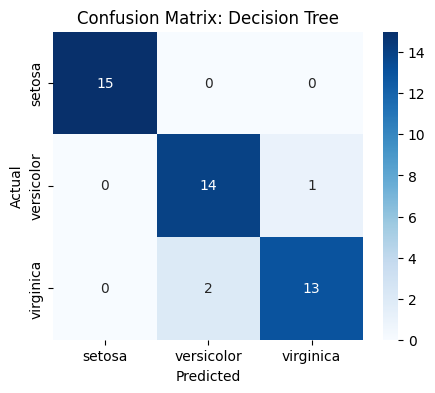


🔹 Training Random Forest...
✅ Accuracy: 0.8889
📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



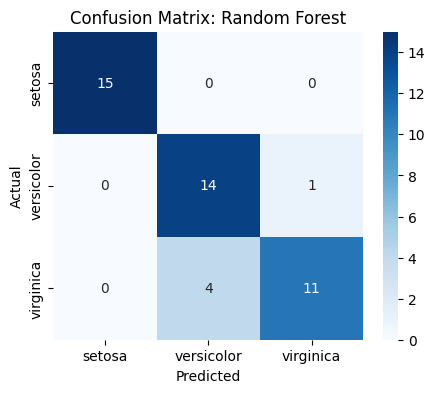


🔹 Training SVM...
✅ Accuracy: 0.9333
📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



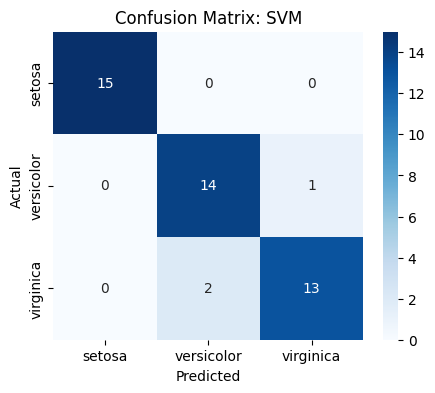


🔹 Training K-Nearest Neighbors...
✅ Accuracy: 0.9111
📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      1.00      0.88        15
           2       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



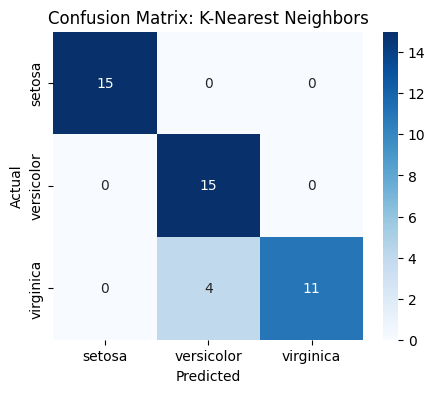


🔹 Training Naive Bayes...
✅ Accuracy: 0.9111
📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



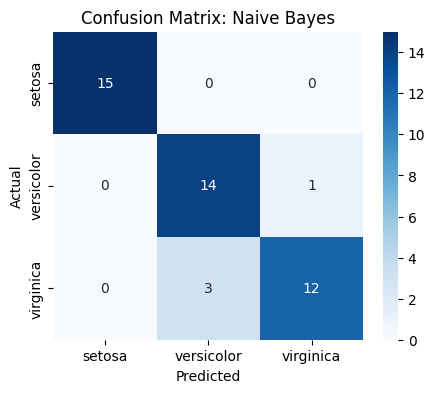


🔹 Training Gradient Boosting...
✅ Accuracy: 0.9333
📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



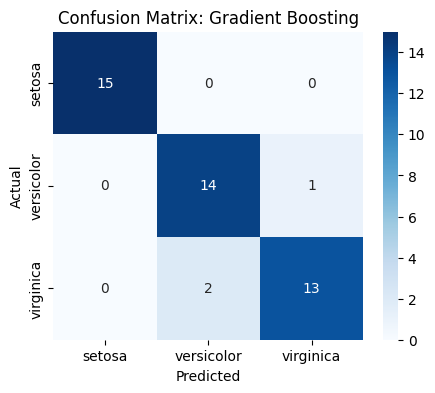

In [9]:
# Step 7: Train and Evaluate Each Model
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")

    # Use scaled data for SVM & KNN, unscaled for others
    if name in ["SVM", "K-Nearest Neighbors"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Store results
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Print Evaluation Metrics
    print(f"✅ Accuracy: {accuracy:.4f}")
    print("📊 Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

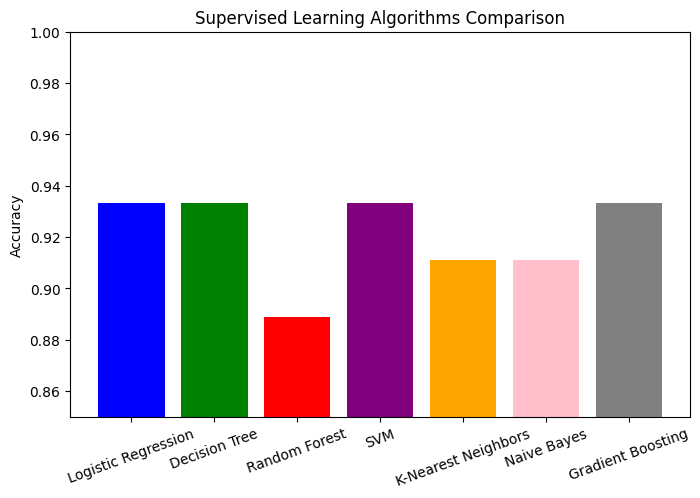

In [10]:
# Step 8: Compare Model Accuracies
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'pink', 'gray'])
plt.ylabel("Accuracy")
plt.title("Supervised Learning Algorithms Comparison")
plt.xticks(rotation=20)
plt.ylim(0.85, 1.0)  # Since all models perform well
plt.show()

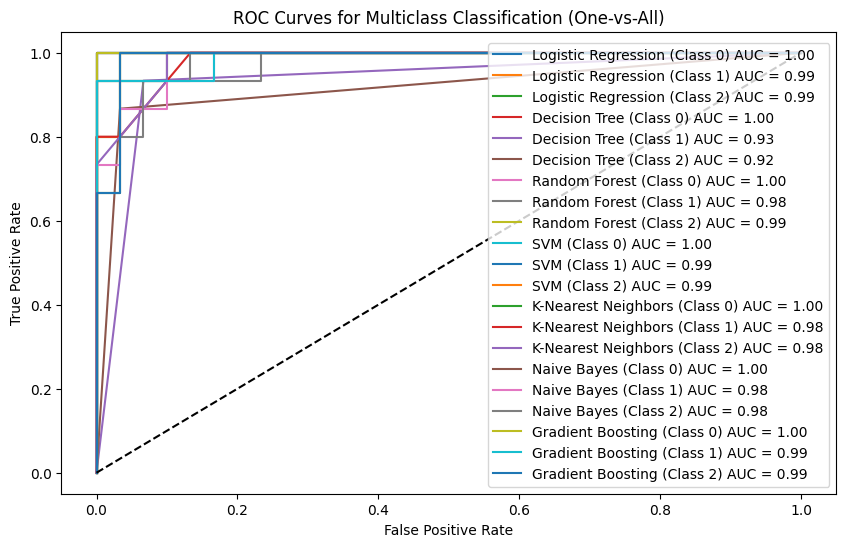

In [11]:
# Step 9: ROC Curve for Multiclass Classification (One-vs-Rest Approximation)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Convert to binary for AUC score

plt.figure(figsize=(10, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        if name in ["SVM", "K-Nearest Neighbors"]:
            y_score = model.predict_proba(X_test_scaled)
        else:
            y_score = model.predict_proba(X_test)

        # Compute ROC curve and AUC for each class
        for i in range(3):  # Three classes in Iris dataset
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{name} (Class {i}) AUC = {roc_auc:.2f}")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multiclass Classification (One-vs-All)")
plt.legend(loc="lower right")
plt.show()